### Logistic Regression

<ul>
    <li>Used to predict the probability of an outcome</li>
    <li>Ouputs binary or multiple class prediction. Is a supervised learning method</li>
</ul>

<div>
    <b> Sigmoid function equation</b>
    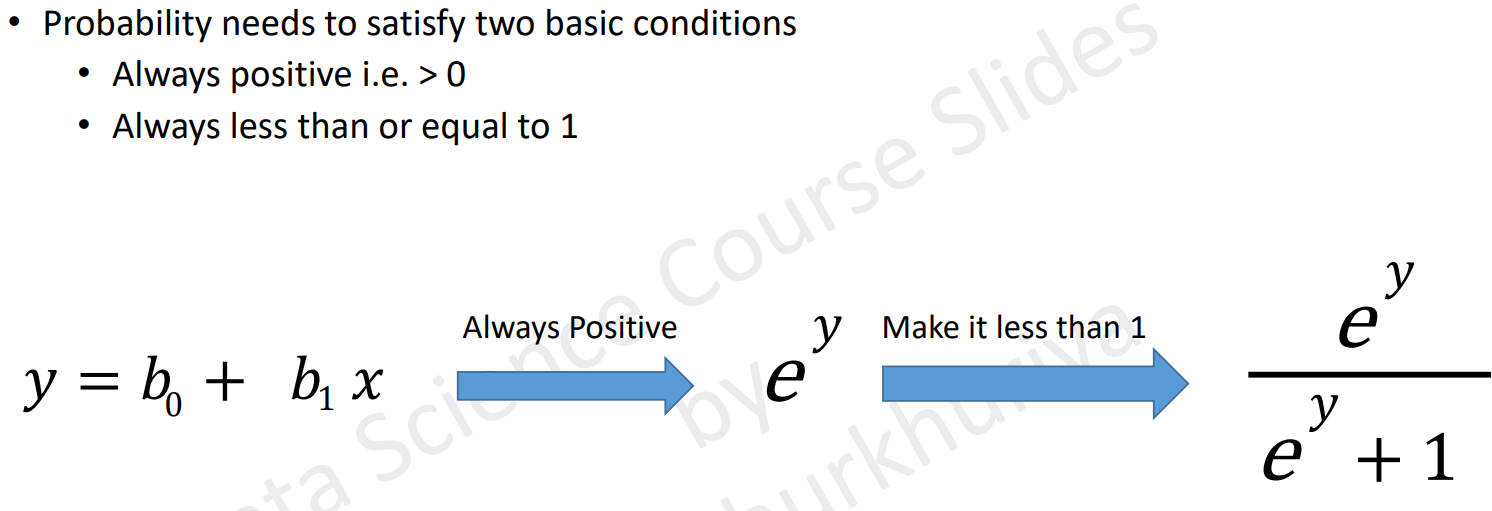
    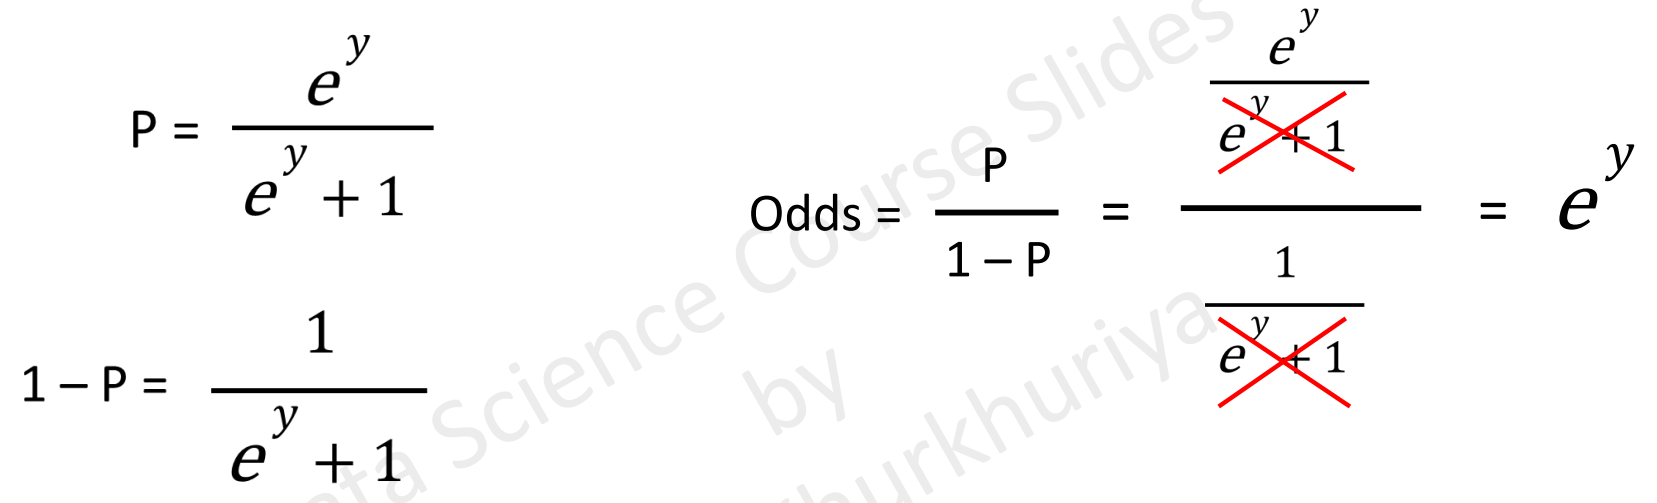
    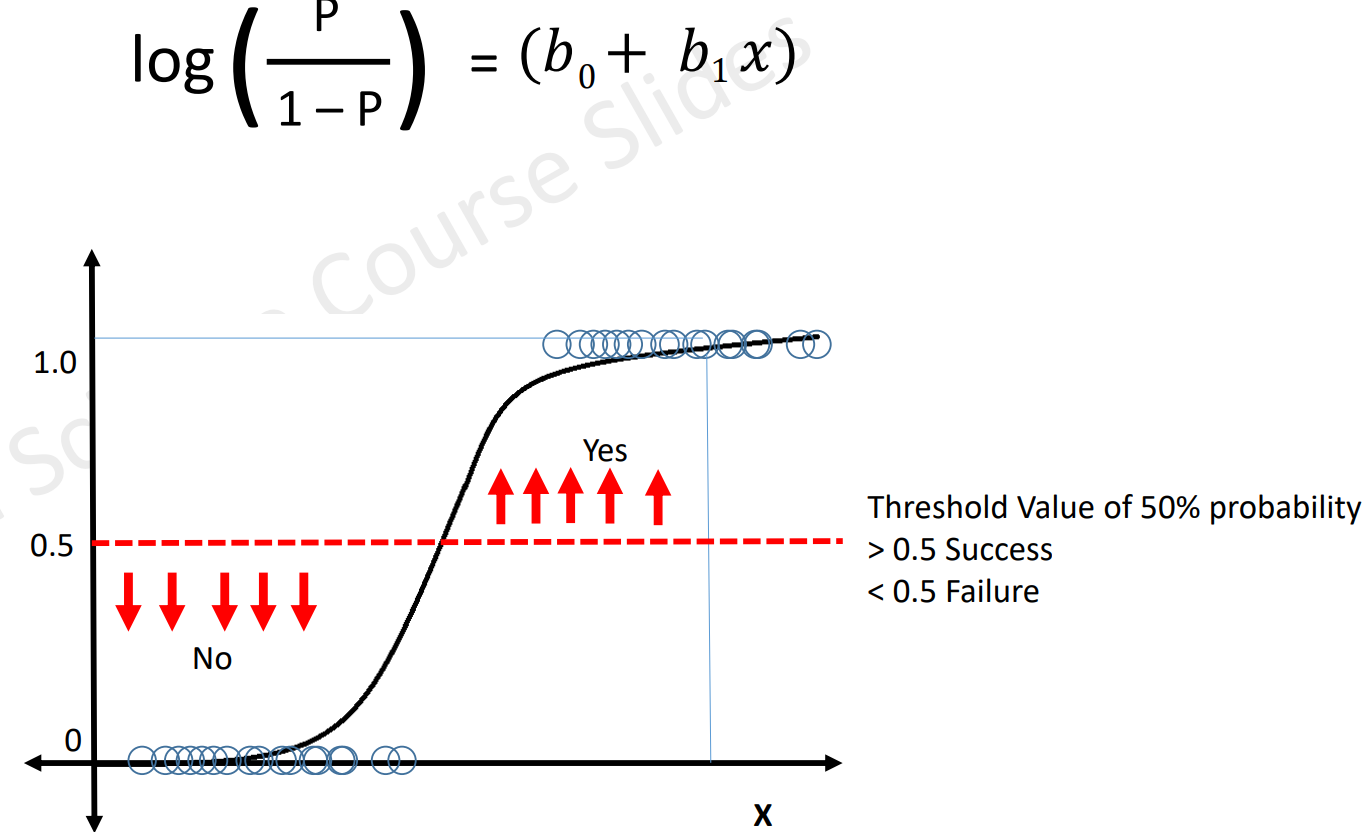
</div>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/01Exercise1.csv")
df.head()

gender married   ch  income  loanamt status
0   Male      No  1.0    5849      NaN      Y
1   Male     Yes  1.0    4583    128.0      N
2   Male     Yes  1.0    3000     66.0      Y
3   Male     Yes  1.0    2583    120.0      Y
4   Male      No  1.0    6000    141.0      Y

In [3]:
pd.DataFrame(df.isnull().sum())

0
gender   13
married   3
ch       50
income    0
loanamt  22
status    0

### Steps
<ol>
    <li>Deal with missing vals</li>
    <li>Create Dummy Variables</li>
    <li>Normalize the data</li>
    <li>Select the relevant columns</li>
    <li>Train test split</li>
    <li>Train and evaluate model</li>
</ol>

In [4]:
df.dropna(inplace=True)
df.drop(['gender'],axis=1,inplace=True) # drop irrelevant feature of gender
df

married   ch  income  loanamt status
1       Yes  1.0    4583    128.0      N
2       Yes  1.0    3000     66.0      Y
3       Yes  1.0    2583    120.0      Y
4        No  1.0    6000    141.0      Y
5       Yes  1.0    5417    267.0      Y
..      ...  ...     ...      ...    ...
609      No  1.0    2900     71.0      Y
610     Yes  1.0    4106     40.0      Y
611     Yes  1.0    8072    253.0      Y
612     Yes  1.0    7583    187.0      Y
613      No  0.0    4583    133.0      N

[529 rows x 5 columns]

In [5]:
df = pd.get_dummies(df, drop_first=True)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['income','loanamt']] = scaler.fit_transform(df[['income','loanamt']])

In [7]:
df

ch    income   loanamt  married_Yes  status_Y
1    1.0 -0.128073 -0.194250            1         0
2    1.0 -0.392077 -0.971015            1         1
3    1.0 -0.461621 -0.294478            1         1
4    1.0  0.108246 -0.031380            0         1
5    1.0  0.011017  1.547205            1         1
..   ...       ...       ...          ...       ...
609  1.0 -0.408754 -0.908372            0         1
610  1.0 -0.207624 -1.296754            1         1
611  1.0  0.453802  1.371807            1         1
612  1.0  0.372249  0.544929            1         1
613  0.0 -0.128073 -0.131608            0         0

[529 rows x 5 columns]

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df,df['status_Y'],
                                                 random_state=1,
                                                 stratify=df['status_Y'])

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [10]:
pred = model.predict(x_test)

In [11]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
cm

array([[41,  0],
       [ 0, 92]], dtype=int64)

In [14]:
score = model.score(x_test,y_test)
score

1.0